In [1]:
import seaborn as sns
df=sns.load_dataset('tips')  #tips is study dataset   
df 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [2]:
df.dtypes  #category=object

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [3]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [4]:
#corelation  ==== corr()   #numeric values
df.corr(numeric_only=True)

#chi square test==== #object 



,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

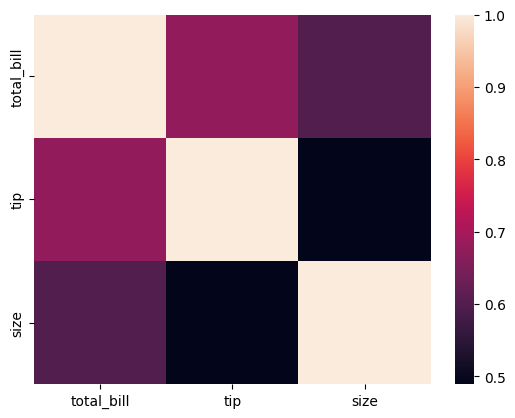

In [5]:
#heat map  === using for plot correlation in graphic
sns.heatmap(df.corr(numeric_only=True))

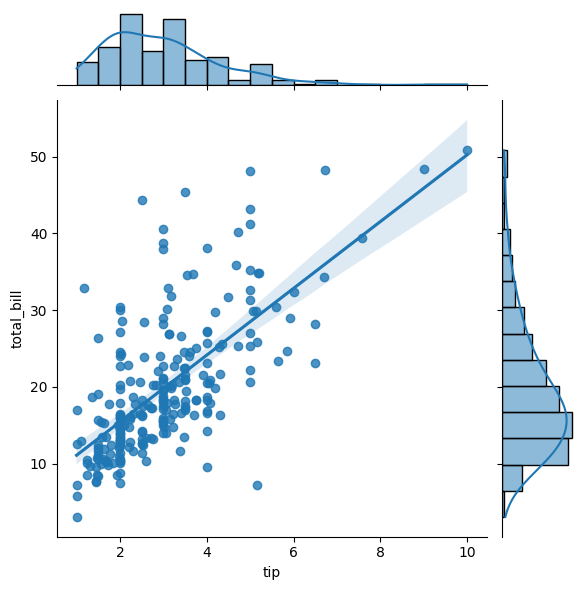

In [8]:
#join plot
sns.jointplot(x='tip',y='total_bill',data=df,kind='reg')   #kind=hex
#output=====scatterplot & histograme

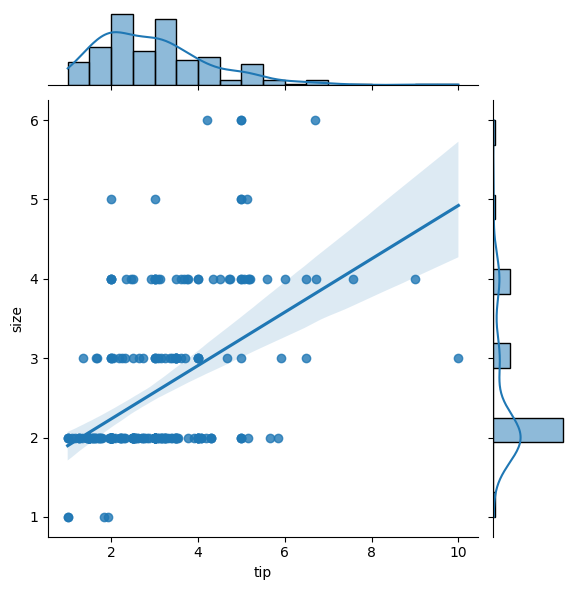

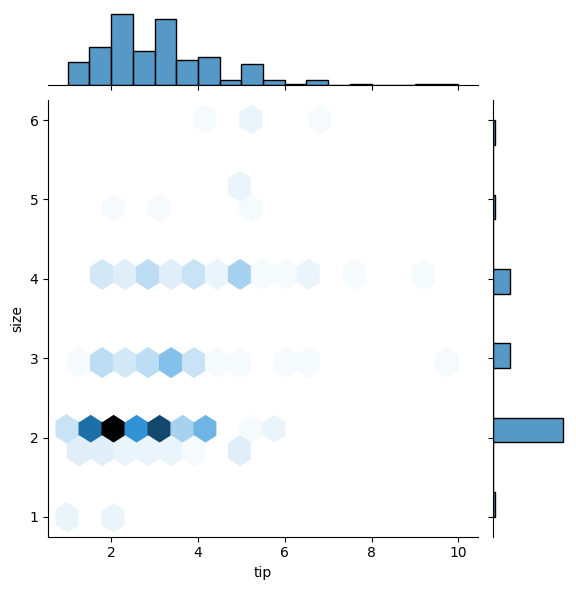

In [ ]:
sns.jointplot(x='tip',y='size',data=df,kind='reg')
sns.jointplot(x='tip',y='size',data=df,kind='hex')

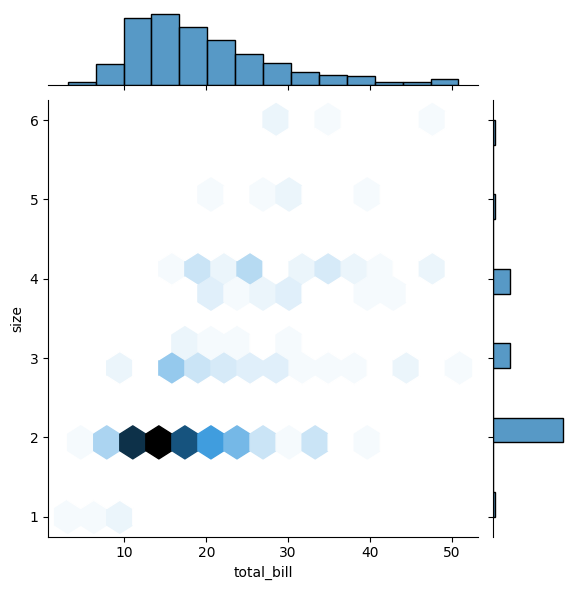

In [ ]:
sns.jointplot(x='total_bill',y='size',data=df,kind='hex')

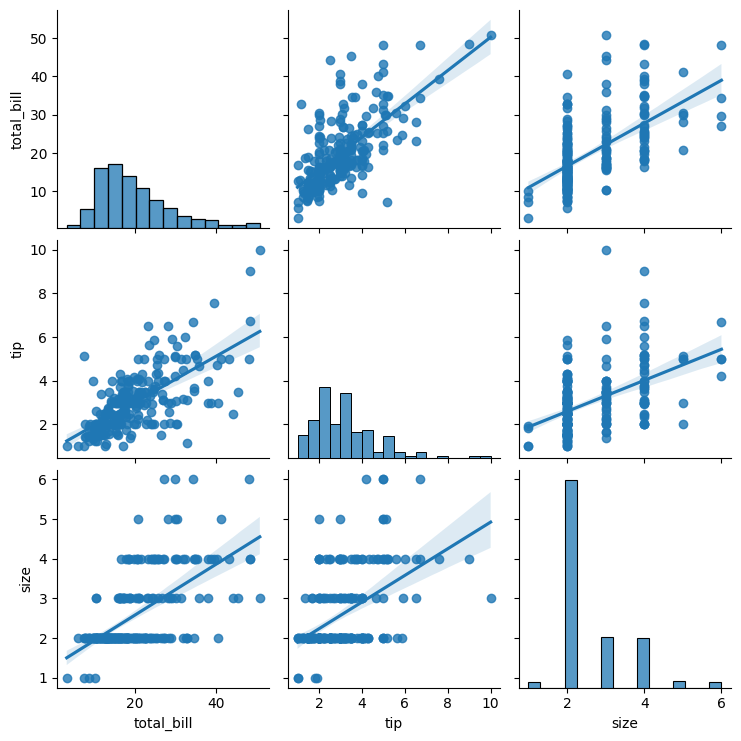

In [ ]:
#pair plot
sns.pairplot(df,kind='reg')


In [ ]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [ ]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [ ]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [ ]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

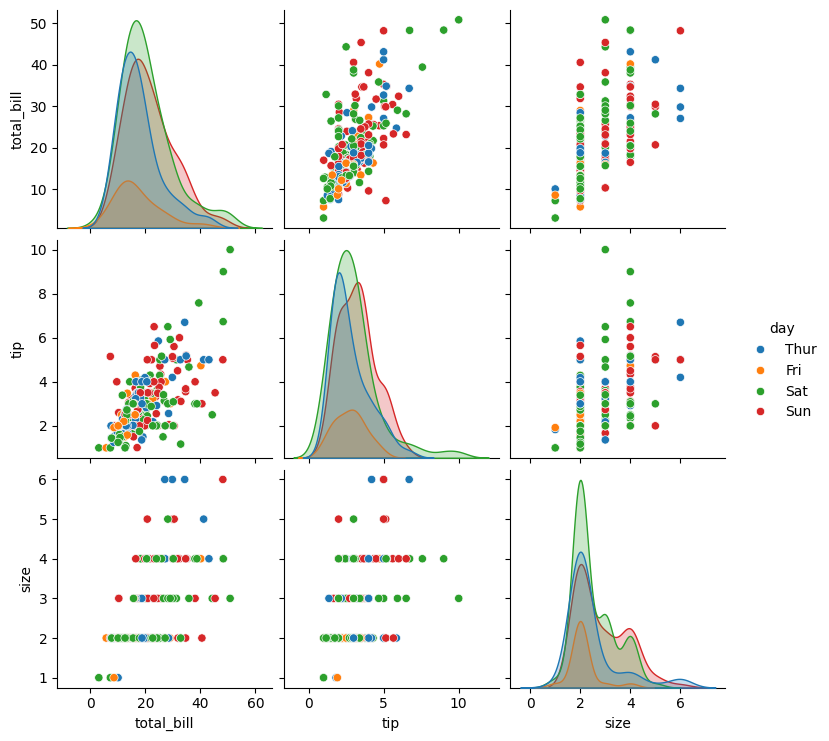

In [ ]:
sns.pairplot(df,hue='day')

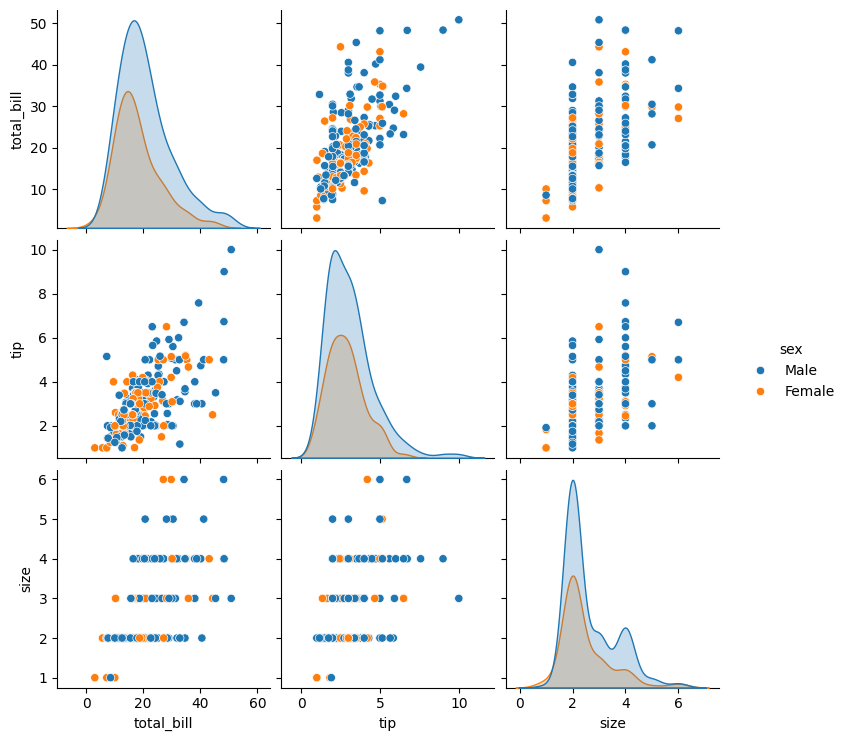

In [ ]:
sns.pairplot(df,hue='sex')

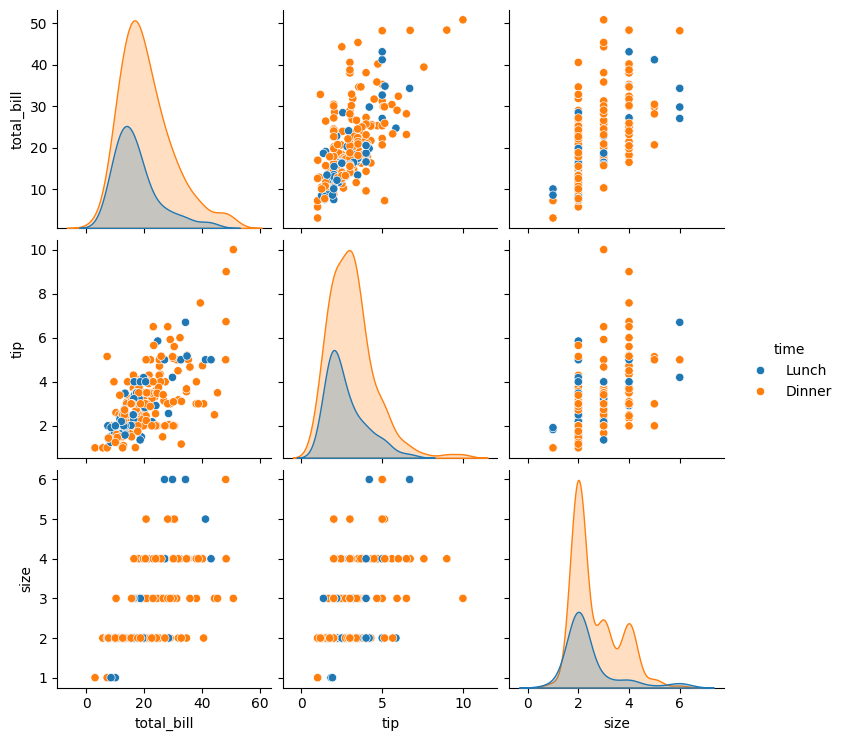

In [ ]:
sns.pairplot(df,hue='time')

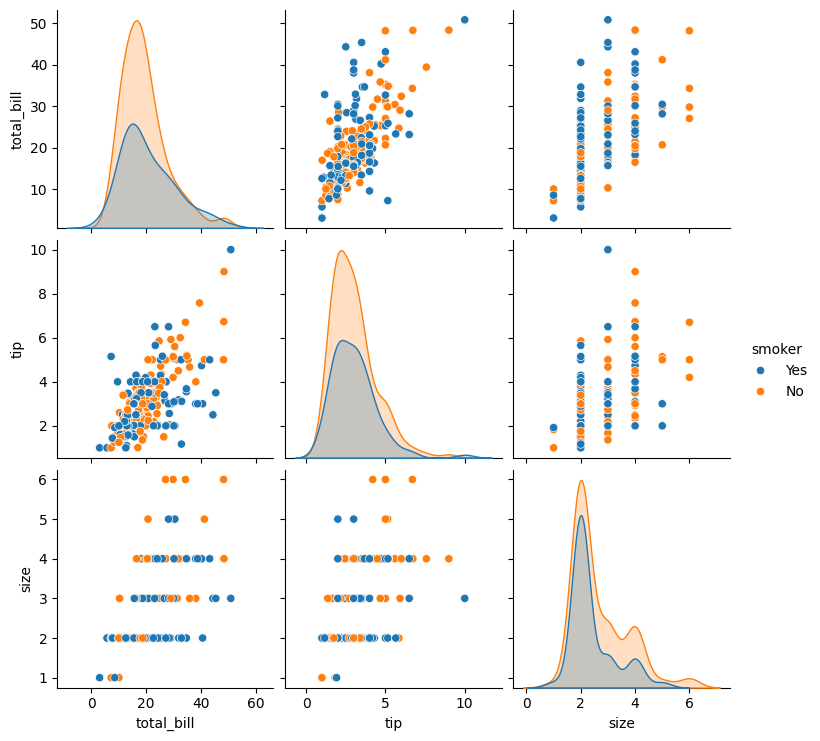

In [ ]:
sns.pairplot(df,hue='smoker')

<AxesSubplot:xlabel='day', ylabel='count'>

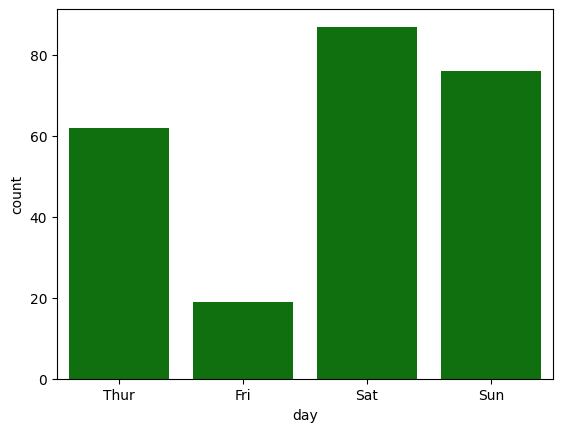

In [ ]:
#count plot
sns.countplot(x='day',data=df,color='g')

<AxesSubplot:xlabel='time', ylabel='count'>

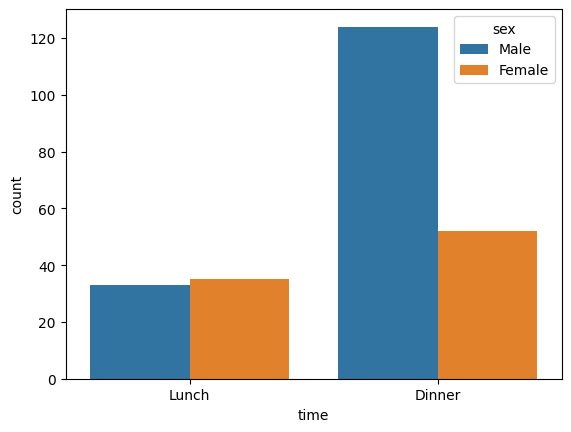

In [ ]:
sns.countplot(x='time',data=df,hue='sex')

C:\Users\amish\AppData\Local\Temp\ipykernel_18688\3373441346.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` for the same effect.

  sns.countplot(x='smoker',data=df,color='r',hue='day')


<AxesSubplot:xlabel='smoker', ylabel='count'>

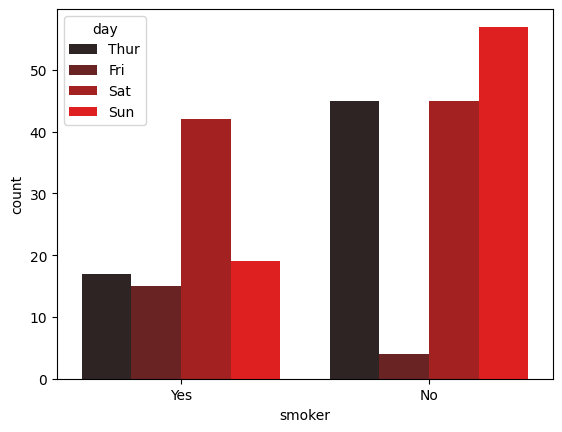

In [ ]:
sns.countplot(x='smoker',data=df,color='r',hue='day')

<AxesSubplot:xlabel='sex', ylabel='count'>

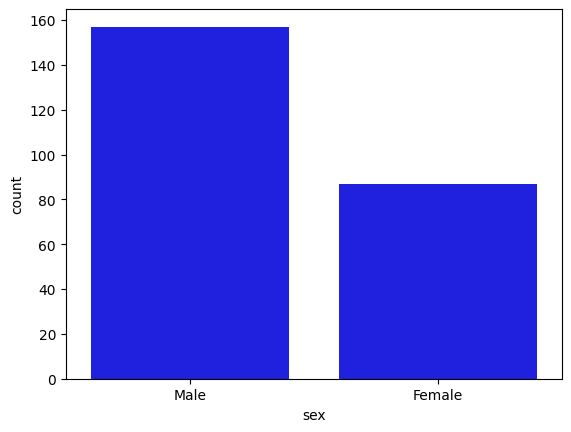

In [ ]:
sns.countplot(x='sex',data=df,color='b')

<AxesSubplot:xlabel='total_bill', ylabel='sex'>

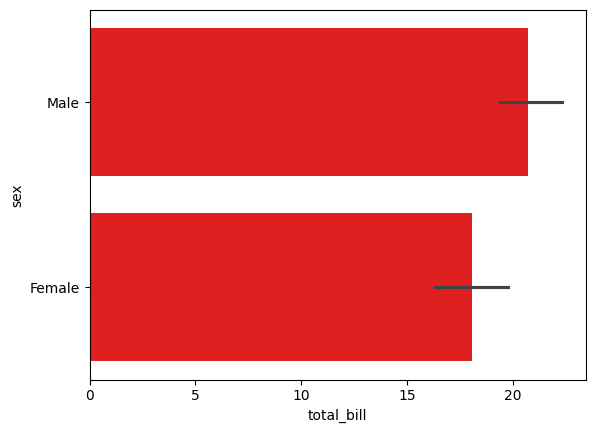

In [ ]:
#bar plot
sns.barplot(x='total_bill',y='sex',data=df,color='r')

<AxesSubplot:ylabel='total_bill'>

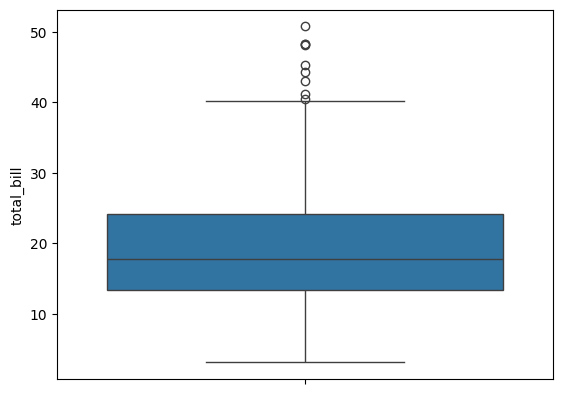

In [ ]:
#box plot
sns.boxplot(y='total_bill',data=df)

<AxesSubplot:ylabel='tip'>

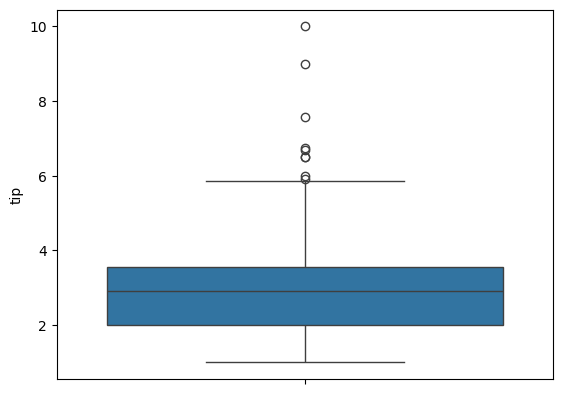

In [ ]:
sns.boxplot(y='tip',data=df)

In [ ]:
#find outliers (working of graph)
import numpy as np
q1=np.percentile(df['total_bill'],25,method='midpoint')
q3=np.percentile(df['total_bill'],75,method='midpoint')
IQR=q3=q1
print(IQR)

13.325


In [ ]:
upper=q3+1.5*IQR
upper_array=np.array(df['total_bill']>=upper)
print('upper bound:',upper)
print(upper_array)
print(upper_array.sum())

# lower=q1-1.5*IQR
# lower_array=np.array(df['total_bill']<=lower)
# print('lowerer bound:',lower)
# print(lower_array)
# print(lower_array.sum())

upper bound: 33.3125
[False False False False False False False False False False False  True
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False  True False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False  True
 False False False False False False  True False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True False
 False False False False False False False False False False False False
  True False False False False

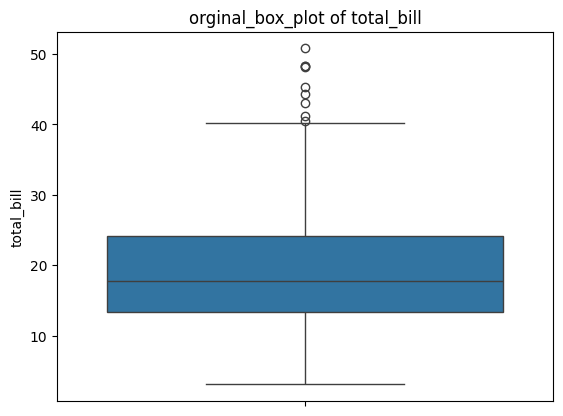

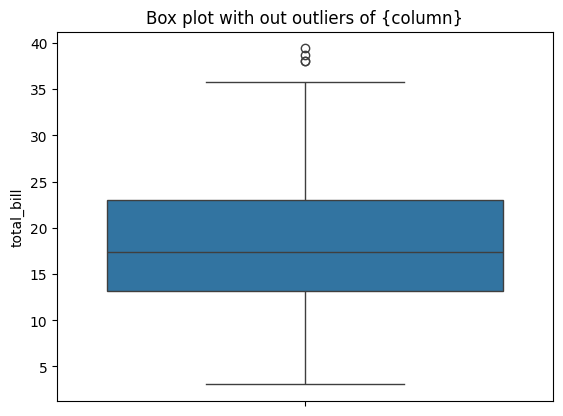

In [ ]:
#outliers removal  
import matplotlib.pyplot as plt
def removal_box_plot(df,column,threshold):    #argument
    sns.boxplot(df[column])    #df['total_bill]  #sns.boxplot(df['total_bill])
    plt.title(f'orginal_box_plot of {column}')  #40
    plt.show()
    
    removed_outliers=df[df[column]<=threshold]  

    sns.boxplot(removed_outliers[column])
    plt.title('Box plot with out outliers of {column}')
    plt.show
    return removed_outliers

threshold_value=40

no_outliers=removal_box_plot(df,'total_bill',threshold_value)


